<a href="https://colab.research.google.com/github/fardsnog2/Third_itog_work/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## Данные

**Загружаем данные**

In [54]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
import numpy as np
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape

(60000, 28, 28)

## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

In [55]:
import matplotlib.pyplot as plt

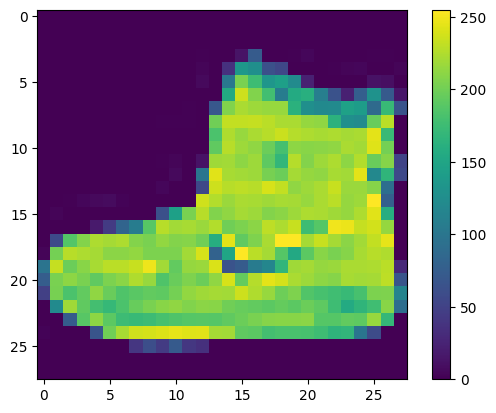

In [56]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Предобработка

**Нормализуйте данные X_train и X_test **

In [57]:
x_train = x_train / 255.0

x_test = x_test / 255.0

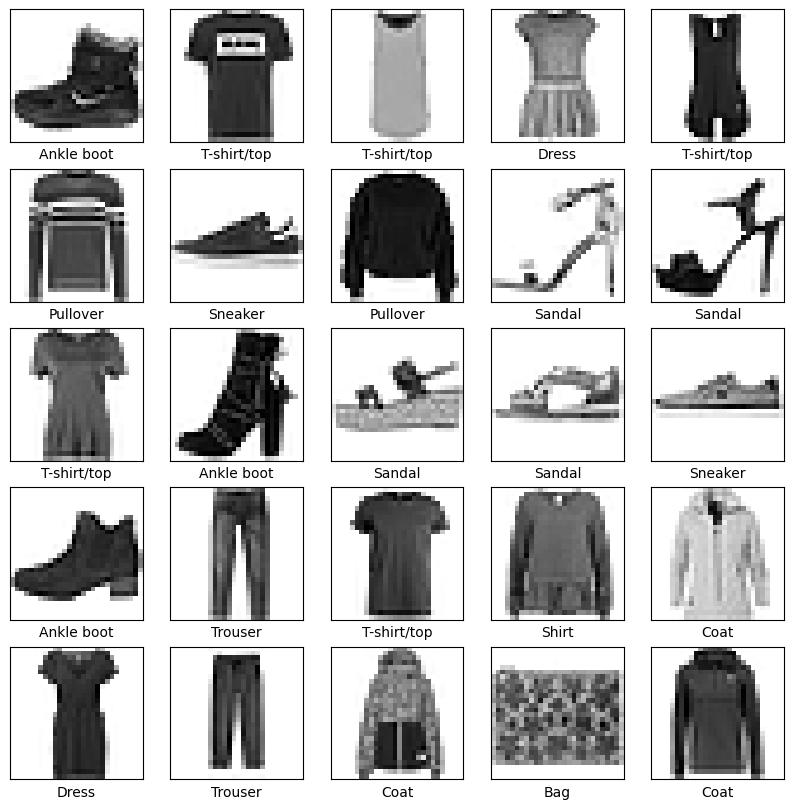

In [58]:
#Проверить данные

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [59]:
n_input = 784
batch_size = 32
img_height = 28
img_width = 28
x_train=x_train[...,None]
x_train.shape

(60000, 28, 28, 1)

In [60]:
x_test=x_test[...,None]
x_test.shape

(10000, 28, 28, 1)

**Преобразуйте  y_train и y_test в one_hot представления **

In [61]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

In [62]:

data = array(y_test)
print(data)
y_test = to_categorical(data)
print(y_test)

[9 2 1 ... 8 1 5]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [63]:
data = array(y_train)
print(data)
y_train = to_categorical(data)
print(y_train)

[9 0 0 ... 3 0 5]
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU

* Выходной полносвязный слой с 10 нейронами с softmax

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (4, 4)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [65]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# x_train[0].shape

In [66]:
model.build((None,28,28,1))

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________


### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [68]:
history=model.fit(x_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5562: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 41s 22ms/step - loss: 0.4068 - accuracy: 0.8552
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2749 - accuracy: 0.8996
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2270 - accuracy: 0.9171
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1935 - accuracy: 0.9288
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1661 - accuracy: 0.9394
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1426 - accuracy: 0.9483
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1241 - accuracy: 0.9556
Epoch 8/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1086 - accuracy: 0.9616
Epoch 9/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0959 - accuracy: 0.9659
Epoch 10/10
1875/1875 [==============================] - 40s 21ms/step - lo

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [69]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('acc = ',test_acc )
test_loss

313/313 - 2s - loss: 0.4236 - accuracy: 0.9051 - 2s/epoch - 6ms/step
acc =  0.9050999879837036


0.4236411154270172

In [70]:
test_predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 6ms/step


In [71]:
data = array(test_predictions)
test_predictions = to_categorical(data)

In [72]:
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, test_predictions)
precision_result = precision.result()
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, test_predictions)
recall_result = recall.result()
print(precision_result.numpy(),recall_result.numpy())

0.9051 0.9051


In [73]:
f1_score = tf.keras.metrics.F1Score()
f1_score.update_state(y_test, test_predictions)
f1_score_result = f1_score.result()
f1_score_result.numpy()

array([0.85756975, 0.98233217, 0.8390476 , 0.9039112 , 0.83713686,
       0.974026  , 0.7488201 , 0.95879394, 0.9794487 , 0.96432114],
      dtype=float32)

In [74]:
from sklearn.metrics import classification_report

In [75]:

print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.88      0.84      1000
           3       0.87      0.94      0.90      1000
           4       0.87      0.81      0.84      1000
           5       0.97      0.97      0.97      1000
           6       0.79      0.71      0.75      1000
           7       0.96      0.95      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000
 samples avg       0.91      0.91      0.91     10000



## Дополнительно

* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели

In [76]:

activation_model = keras.Model(inputs=model.input,
                         outputs=model.layers[0].output)

In [77]:
activation_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1_input (InputLayer  [(None, 28, 28, 1)]       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
Total params: 544 (2.12 KB)
Trainable params: 544 (2.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


313/313 [==============================] - 2s 6ms/step
AxesImage(size=(25, 25))
AxesImage(size=(25, 25))


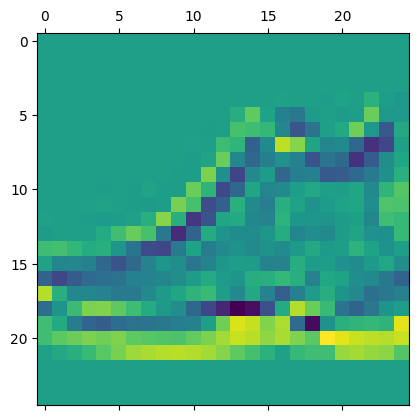

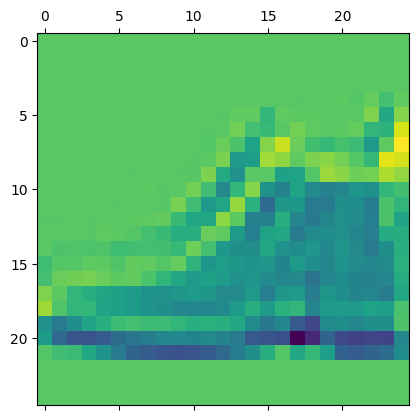

In [78]:

activation = activation_model.predict(x_test)
print(plt.matshow(activation[0, :, :, 0], cmap='viridis'))
print(plt.matshow(activation[0, :, :, -1], cmap='viridis'))

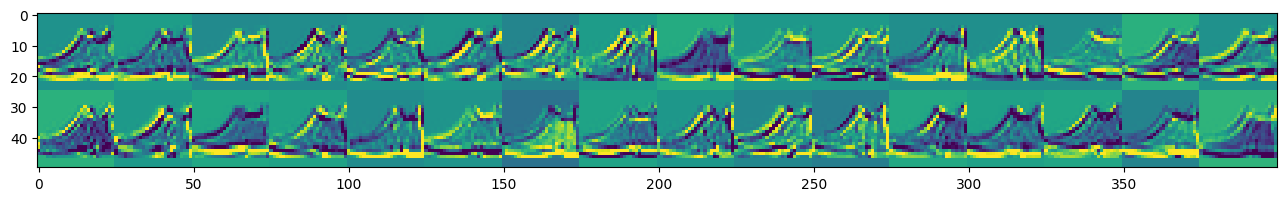

In [79]:
images_per_row = 16
n_filters = activation.shape[-1]
size = activation.shape[1]
n_cols = n_filters // images_per_row

display_grid = np.zeros((n_cols * size, images_per_row * size))

for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = activation[0, :, :, col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [80]:
#надеюсь верно нарисовал фильтры слоев